In [2]:
from databaseCommunication import getNCount, createDataFrame_images
from dataframeFormating import createLabeledDataFrame, createLabeledDataFrame_images
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ODT_power import ODT_power

In [3]:
# Number calibration
manualLabelsValues = [
    [[103319, 103326], ['sameAsExp']],
    [[103310, 103317], ['realNumber']],
                        ]
manualLabels = ['calibration']
variablesCicero = ['runID']
variableAnalysis = ['nCount']
#df_calibration = createLabeledDataFrame(variablesCicero, variableAnalysis, manualLabels, manualLabelsValues)
#df_calibration.to_pickle('data_save_180321_calibration.pickle')
df_calibration = pd.read_pickle('data_save_180321_calibration.pickle')
expNumber = df_calibration[df_calibration['calibration'] == 'sameAsExp']['nCount'].mean()
realNumber = df_calibration[df_calibration['calibration'] == 'realNumber']['nCount'].mean()
calibrationRatio = realNumber/expNumber

In [4]:
calibrationRatio

0.23317873736977815

In [5]:
manualLabelsValues = [
    [[102887, 102962], ['noGradient', 0]],
    [[102971, 103010], ['noGradient', 1800]],
    [[103027, 103054], ['noGradient', 1800]],
    [[103112, 103175], ['gradient', 0]],
    [[103182, 103209], ['gradient', 2000]],
    [[103212, 103225], ['gradient', 2000]],
    [[103226, 103265], ['gradient', 2000]],
    [[103056, 103065], ['noGradient', 1800]],
    [[103066, 103075], ['noGradient', 1800]],
    [[103079, 103088], ['noGradient', 1800]],
    [[103267, 103296], ['gradient', 2000]]
                        ]
manualLabels = ['evapType', 'evapTimeBeforeTemp']
variablesCicero = ['temp', 'TOF']
variableAnalysis = ['nCount', 'xWidth', 'yWidth']

In [6]:
excluded = [103156, 103170, 103137, 103162, 103132, 103129, 103154, 103155, 103153, 102949, 102948, 102943]

In [7]:
#df = createLabeledDataFrame(variablesCicero, variableAnalysis, manualLabels, manualLabelsValues)
#df['xWidth'] *= 3.45*10**(-6)
#df['yWidth'] *= 3.45*10**(-6)
#df.to_pickle('data_save_180321.pickle')

In [8]:
df = pd.read_pickle('data_save_180321.pickle')
df['evapTimeBeforeTemp'] = df['evapTimeBeforeTemp'].astype(float)
df['imageID'] = df['imageID'].astype(int)
df['temp'] = df['temp'].astype(float)
df['xWidth'] = df['xWidth'].astype(float)
df['yWidth'] = df['yWidth'].astype(float)
df['TOF'] = df['TOF'].astype(float)
df['nCount'] *= calibrationRatio
df['PSD'] = df['nCount']/((df['yWidth']/df['TOF'])**6)
df['totalEvapTime'] = df['evapTimeBeforeTemp'] + df['temp']
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)
df

,imageID,evapType,evapTimeBeforeTemp,TOF,nCount,temp,xWidth,yWidth,PSD,totalEvapTime
0,102887,noGradient,0.0,3.0,3.046177e+06,400.0,97.9591,61.3349,0.041710,400.0
1,102888,noGradient,0.0,3.0,3.383190e+06,250.0,77.0254,62.4247,0.041679,250.0
2,102889,noGradient,0.0,5.0,4.130295e+06,100.0,158.9130,113.1840,0.030697,100.0
3,102890,noGradient,0.0,3.0,3.481941e+06,200.0,82.5630,64.2902,0.035948,200.0
4,102891,noGradient,0.0,3.0,2.615613e+06,600.0,94.8450,59.1956,0.044316,600.0
...,...,...,...,...,...,...,...,...,...,...
345,103292,gradient,2000.0,10.0,2.509703e+03,3600.0,16.9779,24.5539,11.452476,5600.0
346,103293,gradient,2000.0,10.0,6.788113e+04,3600.0,24.3201,28.3016,132.094010,5600.0
347,103294,gradient,2000.0,10.0,7.416483e+04,3600.0,24.6940,27.2422,181.444972,5600.0
348,103295,gradient,2000.0,10.0,6.965795e+04,3600.0,25.8941,28.6276,126.549680,5600.0


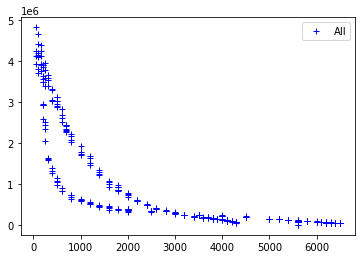

In [9]:
plt.figure()
plt.plot(df['totalEvapTime'], df['nCount'], '+', color = 'blue', label = 'All')
plt.legend()
plt.show()

In [10]:
df_noGradient = df[df['imageID'] <= 103054]
df_Gradient = df[(103112 <= df['imageID']) & (103265 >= df['imageID'])]

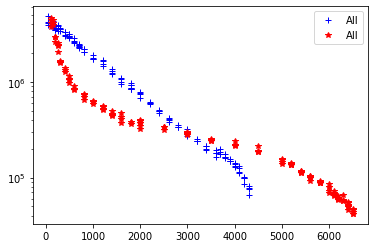

In [11]:
plt.figure()
plt.semilogy(df_noGradient['totalEvapTime'], df_noGradient['nCount'], '+', color = 'blue', label = 'All')
plt.semilogy(df_Gradient['totalEvapTime'], df_Gradient['nCount'], '*', color = 'red', label = 'All')
plt.legend()
plt.show()

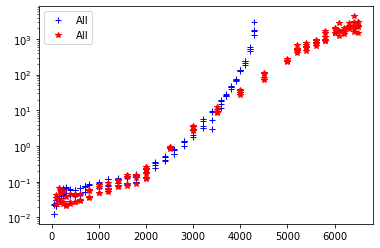

In [12]:
plt.figure()
plt.semilogy(df_noGradient['totalEvapTime'], df_noGradient['PSD'], '+', color = 'blue', label = 'All')
plt.semilogy(df_Gradient['totalEvapTime'], df_Gradient['PSD'], '*', color = 'red', label = 'All')
plt.legend()
plt.show()

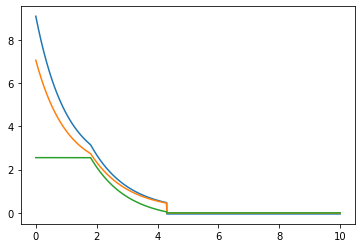

In [13]:
t = np.linspace(0, 10, 10000)
plt.figure()
plt.plot(t, ODT_power(1, t))
plt.plot(t, ODT_power(2, t))
plt.plot(t, ODT_power(3, t))
#plt.plot(t, ODT_power(1, t, with_gradient = True), '--')
#plt.plot(t, ODT_power(2, t, with_gradient = True), '--')
#plt.plot(t, ODT_power(3, t, with_gradient = True), '--')
plt.show()

/usr/local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


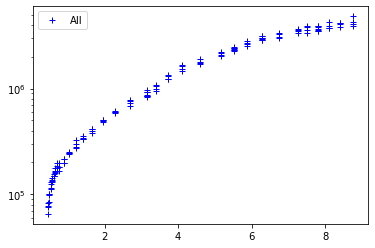

In [14]:
plt.figure()
plt.semilogy(ODT_power(1, df_noGradient['totalEvapTime']/1000), df_noGradient['nCount'], '+', color = 'blue', label = 'All')
plt.legend()
plt.show()

In [15]:
ODT_power(1, df_noGradient['totalEvapTime']/1000)

/usr/local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


0      6.748121
1      7.520935
2      8.418818
3      7.805396
4      5.882498
         ...   
139    0.500028
140    0.500028
141    0.617848
142    0.466860
143    0.617848
Name: totalEvapTime, Length: 141, dtype: float64

In [16]:
df_noGradient['PSD']

0         0.041710
1         0.041679
2         0.030697
3         0.035948
4         0.044316
          ...     
139     580.727395
140     455.282524
141      68.735527
142    1738.241308
143      70.527946
Name: PSD, Length: 141, dtype: float64

In [17]:
df

,imageID,evapType,evapTimeBeforeTemp,TOF,nCount,temp,xWidth,yWidth,PSD,totalEvapTime
0,102887,noGradient,0.0,3.0,3.046177e+06,400.0,97.9591,61.3349,0.041710,400.0
1,102888,noGradient,0.0,3.0,3.383190e+06,250.0,77.0254,62.4247,0.041679,250.0
2,102889,noGradient,0.0,5.0,4.130295e+06,100.0,158.9130,113.1840,0.030697,100.0
3,102890,noGradient,0.0,3.0,3.481941e+06,200.0,82.5630,64.2902,0.035948,200.0
4,102891,noGradient,0.0,3.0,2.615613e+06,600.0,94.8450,59.1956,0.044316,600.0
...,...,...,...,...,...,...,...,...,...,...
345,103292,gradient,2000.0,10.0,2.509703e+03,3600.0,16.9779,24.5539,11.452476,5600.0
346,103293,gradient,2000.0,10.0,6.788113e+04,3600.0,24.3201,28.3016,132.094010,5600.0
347,103294,gradient,2000.0,10.0,7.416483e+04,3600.0,24.6940,27.2422,181.444972,5600.0
348,103295,gradient,2000.0,10.0,6.965795e+04,3600.0,25.8941,28.6276,126.549680,5600.0


In [18]:
def computeTemperature(df1):
    df = df1.copy()
    df["Temperature"] = np.nan
    for evapType in ["gradient", "noGradient"]:
        df_current1 = df[df["evapType"] == evapType]
        print(df_current1)
        for totalEvapTime in np.sort(df_current1["totalEvapTime"].unique()):
            print(evapType, totalEvapTime)
            df_current = df_current1[df_current1["totalEvapTime"] == totalEvapTime]
            #print(df_current)
            TOF_list = np.sort(df_current["TOF"].unique())
            #print(TOF_list)
            #print(df_current[df_current["TOF"] == TOF_list[0]]["yWidth"])
            yWidth1 = df_current[df_current["TOF"] == TOF_list[0]]["yWidth"].mean()
            yWidth2 = df_current[df_current["TOF"] == TOF_list[1]]["yWidth"].mean()
            temperature = (yWidth2 - yWidth1)/(TOF_list[1] - TOF_list[0])
            for i, row in df_current.iterrows():
                print(i, temperature)
                df["Temperature"].iloc[i] = temperature
    return df

In [19]:
df_current1 = df[df["evapType"] == "gradient"]
df_current2 = df_current1[df_current1["totalEvapTime"] == 100]
TOF_list = df_current2["TOF"].unique()
#df_current2
df_current2[df_current2["TOF"] == TOF_list[0]]#["yWidth"].mean()
print(np.sort(df_current1["totalEvapTime"].unique()))

[ 100.  150.  200.  250.  300.  400.  500.  600.  800. 1000. 1200. 1400.
 1600. 1800. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5200. 5400. 5600.
 5800. 6000. 6100. 6200. 6300. 6400. 6500.]


In [20]:
df1 = computeTemperature(df)

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

     imageID  evapType  evapTimeBeforeTemp   TOF        nCount    temp  \
144   103112  gradient                 0.0   3.0  4.147107e+06   100.0   
145   103113  gradient                 0.0   5.0  5.402098e+05  1200.0   
146   103114  gradient                 0.0   5.0  6.375480e+05  1000.0   
147   103115  gradient                 0.0   3.0  1.274716e+06   400.0   
148   103116  gradient                 0.0   3.0  9.779376e+05   500.0   
..       ...       ...                 ...   ...           ...     ...   
345   103292  gradient              2000.0  10.0  2.509703e+03  3600.0   
346   103293  gradient              2000.0  10.0  6.788113e+04  3600.0   
347   103294  gradient              2000.0  10.0  7.416483e+04  3600.0   
348   103295  gradient              2000.0  10.0  6.965795e+04  3600.0   
349   103296  gradient              2000.0  10.0  7.004992e+04  3600.0   

       xWidth   yWidth         PSD  totalEvapTime  Temperature  
144  115.5070  71.0547    0.023492          10

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


IndexError: iloc cannot enlarge its target object

In [ ]:
df1

In [ ]:
df["evapType"].iloc[5]

# TOF Images

In [ ]:
TOFLabels = [
    [[103056, 103065], ['noGradient', 1800]],
    [[103066, 103075], ['noGradient', 1800]],
    [[103079, 103088], ['noGradient', 1800]],
    [[103267, 103296], ['noGradient', 2000]]
                        ]


df_TOF = createLabeledDataFrame_images(TOFLabels)
"""df['evapTimeBeforeTemp'] = df['evapTimeBeforeTemp'].astype(float)
df['imageID'] = df['imageID'].astype(int)
df['temp'] = df['temp'].astype(float)
df['xWidth'] = df['xWidth'].astype(float)
df['yWidth'] = df['yWidth'].astype(float)
df['TOF'] = df['TOF'].astype(float)
df['nCount'] *= calibrationRatio
df['PSD'] = df['nCount']/((df['yWidth']/df['TOF'])**6)
df['totalEvapTime'] = df['evapTimeBeforeTemp'] + df['temp']
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)"""
df

### ODT power

In [21]:
ODT1_final = ODT_power(1, 4.299)
ODT2_final = ODT_power(2, 4.299)
ODT3_final = ODT_power(3, 4.299)

For a single gaussian beam ODT, the trap depth is : $U = -\frac{1}{2}\text{Re}(\alpha)\frac{I_{0}}{\epsilon_{0}c} = -\text{Re}(\alpha)\frac{P}{\pi w_{0}^{2}\epsilon_{0}c}$ and it goes like $-U_0 e^{-\frac{2r^2}{w_0^2}}\simeq -U_0 + U_0 \frac{2r^2}{w_0^2} = -U_0 + \frac{1}{2}m\omega_\perp^2r^2$ and therefore $\omega_\perp = \sqrt{\frac{4U_0}{mw_0^2}} = \sqrt{\frac{4\text{Re}(\alpha)\frac{P}{\pi w_{0}^{2}\epsilon_{0}c}}{mw_0^2}} = \frac{2}{w_0^2}\sqrt{\frac{\text{Re}(\alpha)P}{\pi m\epsilon_{0}c}}$

In [28]:
ODT1_waist = 42*10**(-6)
ODT2_waist = 42*10**(-6)
ODT3_waist = 30*10**(-6)
ODT_Waists = [0, ODT1_waist, ODT2_waist, ODT3_waist]

polarizability_0 = 1.64877727*10**(-41)
m = 164*1.66053906660*10**(-27)
c = 2.99792458*10**8
epsilon_0 = 8.85418782*10**(-12)
alpha = 180*polarizability_0

def ODT_frequency(n, t):
    return (2/(ODT_Waists[n]**2)*np.sqrt(alpha*ODT_power(n, t)/(np.pi*m*epsilon_0*c)))/(2*np.pi)

In [29]:
print("ODT 1 frequency = " + str(ODT_frequency(1, 4.29)))
print("ODT 2 frequency = " + str(ODT_frequency(2, 4.29)))
print("ODT 3 frequency = " + str(ODT_frequency(3, 4.29)))

ODT 1 frequency = 141.42841007772944
ODT 2 frequency = 138.49682739097105
ODT 3 frequency = 85.88396673694868


To really know what is the trap frequency, one should add along Z the two frequencies of ODT 1 and 2 in quadrature, so probalby $\omega_z \sim 200$ Hz, then along X it is probably also this 200 Hz that dominates. $\omega_x \sim 200$ Hz. Along Y, the intersection of ODT 1 and 2 with an aspect ratio of 10 is probalby quite bellow the ODT 3 frequency, so assuming $\omega_y \sim 90$ Hz is reasonable.

In [30]:
ODT_frequency(3, 0)

646.0383865666947

In [31]:
ODT3_final

0.042431063165920775